In [21]:
%matplotlib inline

import pandas as pd
import geopandas

block_grp = geopandas.read_file("2018NYblockgrpSF/tl_2018_36_bg.shp")

erie_county_blockGrp = block_grp[block_grp['GEOID'].str.contains("36029")]
erie_county_blockGrp         
                                    

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
11,36,029,014603,2,360290146032,Block Group 2,G5030,S,1992416,0,+42.9837512,-078.6869747,"POLYGON ((-78.69695 42.989289, -78.69562499999..."
12,36,029,014601,2,360290146012,Block Group 2,G5030,S,2237921,0,+42.9608352,-078.6827714,"POLYGON ((-78.69694799999999 42.959301, -78.69..."
13,36,029,014601,4,360290146014,Block Group 4,G5030,S,2362636,0,+42.9716503,-078.6869950,POLYGON ((-78.69692999999999 42.97631699999999...
14,36,029,014601,3,360290146013,Block Group 3,G5030,S,1790691,0,+42.9714220,-078.6691991,"POLYGON ((-78.67719199999999 42.96713, -78.677..."
15,36,029,014603,3,360290146033,Block Group 3,G5030,S,2185747,0,+42.9806768,-078.6542591,"POLYGON ((-78.66214099999999 42.976565, -78.66..."
16,36,029,014701,1,360290147011,Block Group 1,G5030,S,2237455,0,+43.0153045,-078.6295041,"POLYGON ((-78.652351 43.015985, -78.64865 43.0..."
74,36,029,016800,2,360290168002,Block Group 2,G5030,S,418211,0,+42.9087575,-078.8646381,"POLYGON ((-78.868179 42.904601, -78.8681689999..."
75,36,029,016800,1,360290168001,Block Group 1,G5030,S,465466,0,+42.9068994,-078.8581310,"POLYGON ((-78.862551 42.904856, -78.8625349999..."
76,36,029,016800,4,360290168004,Block Group 4,G5030,S,408133,0,+42.9125673,-078.8583172,"POLYGON ((-78.862438 42.909975, -78.8624399999..."
154,36,029,014903,4,360290149034,Block Group 4,G5030,S,12298935,21591,+42.8824413,-078.5104635,"POLYGON ((-78.538065 42.881028, -78.538004 42...."


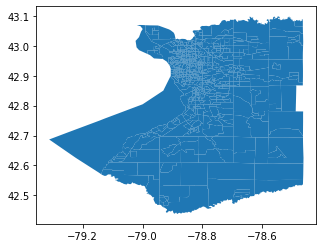

In [23]:
erie_county_blockGrp.plot() #THIS IS ERIE COUNTY PICTURE 

In [ ]:
UB_GENTRIFICATION_BLOCKS